In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("Input/Lens_Simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

241.66608193767414


In [5]:
#parameters of best walker
best_walker = chain[best_log][1]

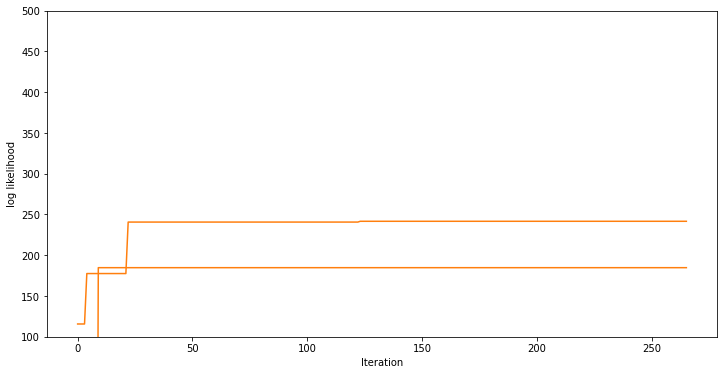

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(100, 500)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

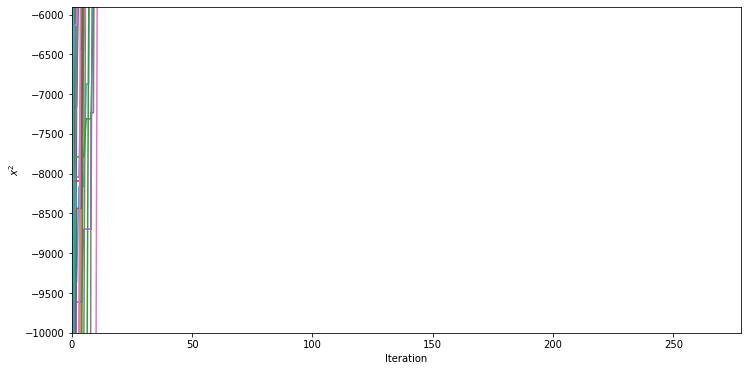

In [7]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [8]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([14.,  4., 12., 11., 23.,  6., 11., 14., 21.,  6., 11., 19., 14.,
       10.,  9.,  8., 14., 18., 13., 14.,  9., 13., 10., 16.,  4., 18.,
       15.,  9.,  5., 11., 17.,  3.,  8.,  9., 16.,  9.,  7., 14.,  8.,
       18., 27.,  8.,  9.,  8., 10.,  8.,  6.,  6.,  9., 13., 16.,  5.,
       17., 14.,  2., 10., 11., 16., 13., 12., 11., 17., 11.,  7., 17.,
       14., 17.,  7.,  8.,  9., 11., 13., 15., 15.,  9., 22., 12., 12.,
        9., 15.,  8., 15.,  7., 15., 13.,  9., 19., 14., 13.,  9., 12.,
        6., 12., 14.,  7., 12.,  9.,  8., 21., 16., 16.,  9., 10., 12.,
       14., 10., 12.,  9., 10., 11., 10., 16., 14.,  7.,  7.,  4., 18.,
       10., 13.,  7.])

[26.21145725 23.19192727 26.55225551 26.09004657 25.38379782 26.9497919
 25.7215594 ]
flat chain shape: (31920, 7)
flat log prob shape: (31920,)


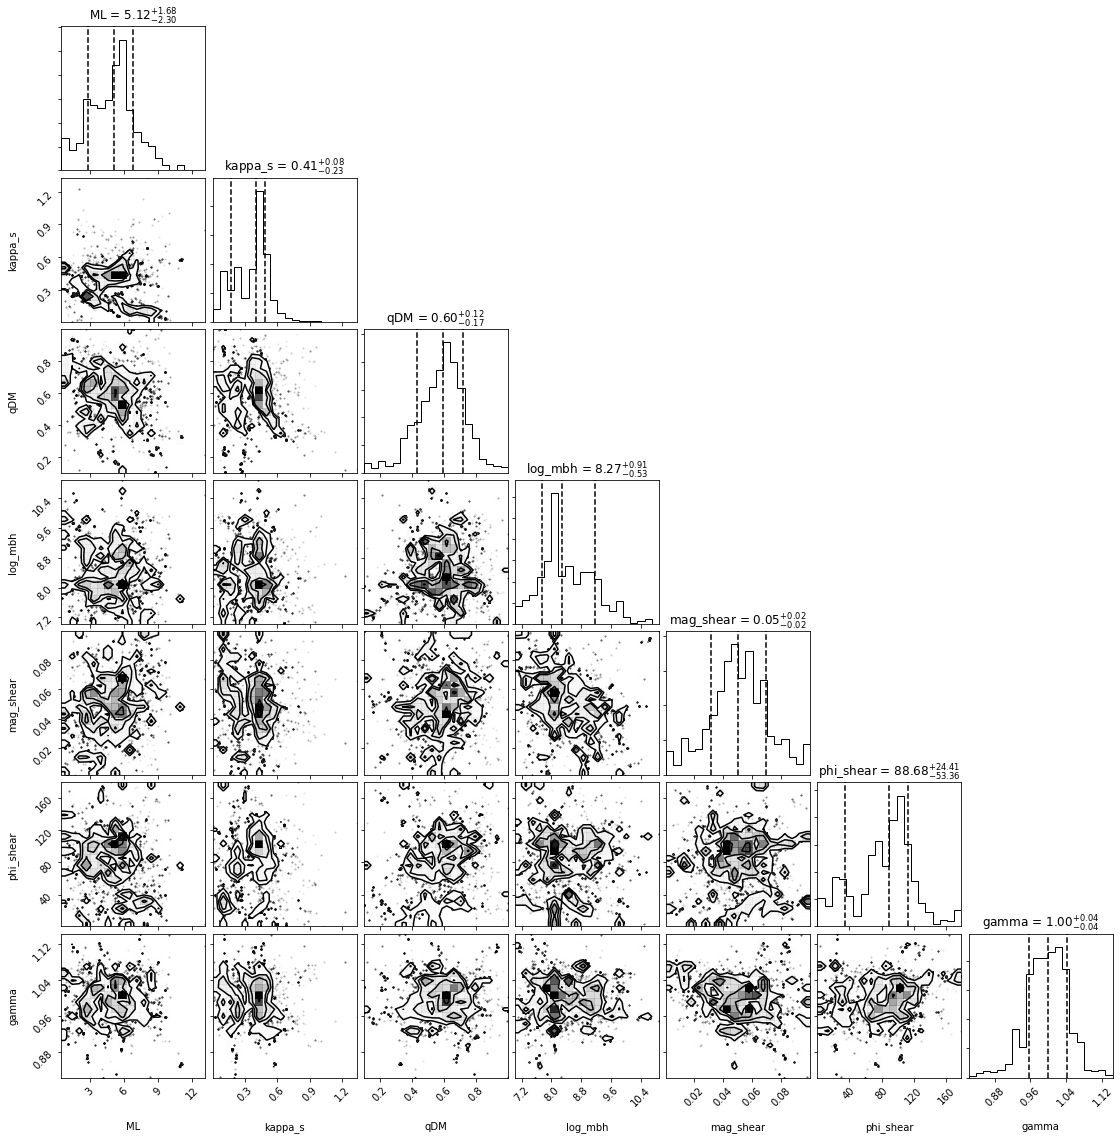

In [9]:
#Corner plots

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

53 13
flat chain shape: (1920, 7)
flat log prob shape: (1920,)


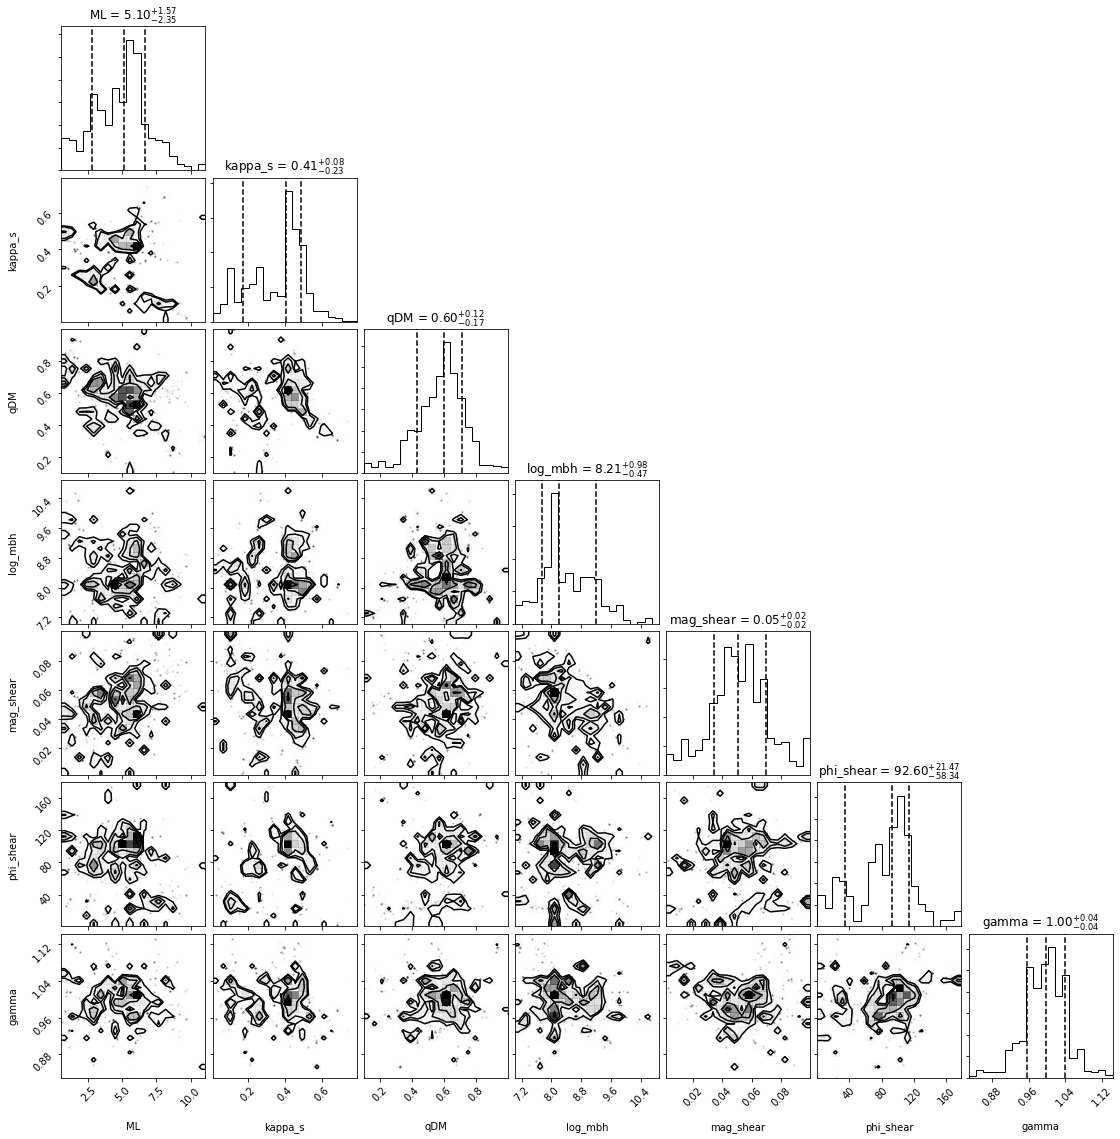

In [10]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [11]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(7):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 7;
tau: [36.26010131 37.61765043 36.85424754 35.84735509 38.60742157 34.5794519
 34.43407512]

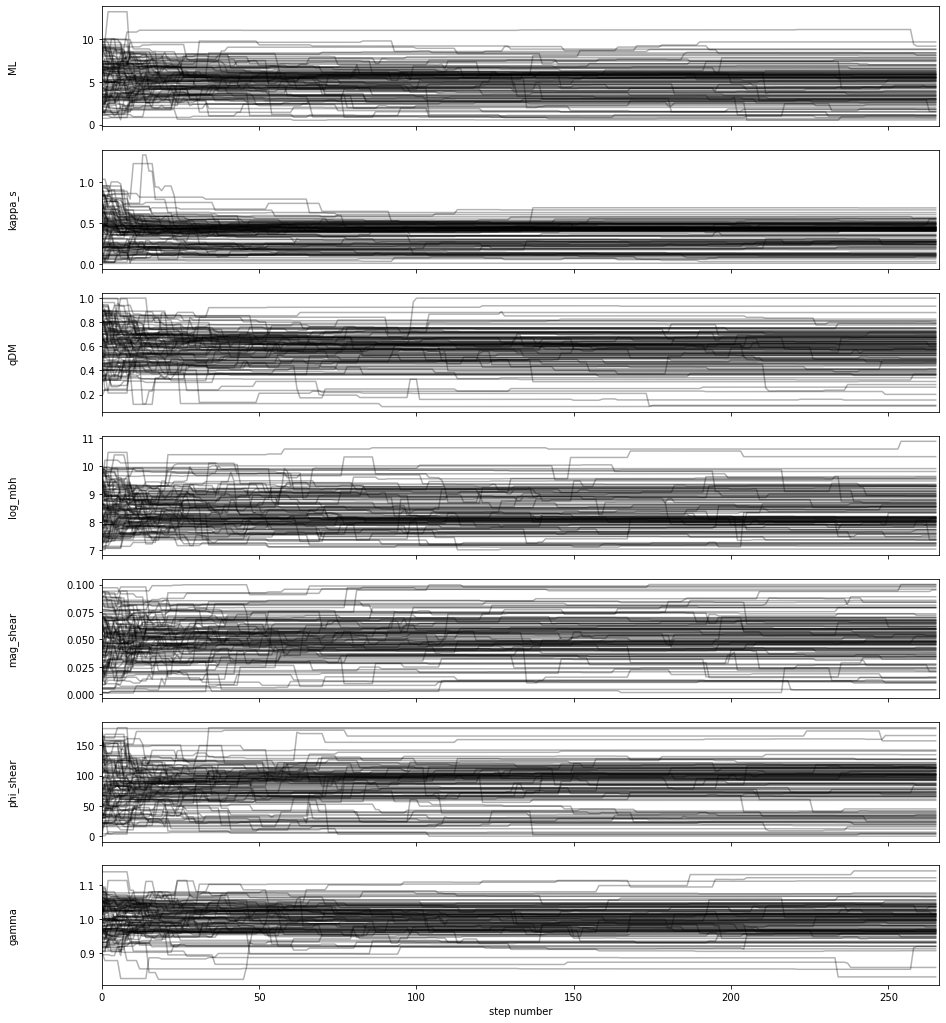

In [12]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [12]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

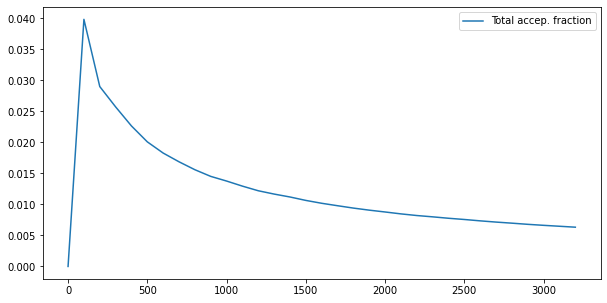

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

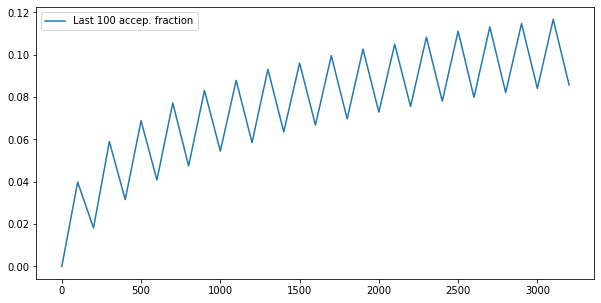

In [14]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [13]:
#Control time packages
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"

#MPI
from schwimmbad import MPIPool

#General packages
import numpy as np
import emcee
import matplotlib.pyplot as plt

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#My Emcee for Pyautolens
import My_Autolens

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_5/Simulation_Data/"

In [14]:
#Reading MGE inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)             #DM component

## Models inicialization

"""
    To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
"""  
#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 4.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 0.075                                                         #kappa_s of DM profile
ml     = 7.00                                                          #mass to light ratio
r_s    = 11.5                                                          #scale radius [arcsec]
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear


#Autolens Data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)   #Masked image
#aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

#--------------------------------------------------------------------------------------------------#
# PYAUTOLENS MODEL
#MGE mass profile
mass_profile = al.mp.MGE()    #Mass class

ell_comps    = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
eNFW         = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps ,scale_radius=r_s) #Analytical eNFW profile


#Components
#Do not include MGE DM component here
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml, mbh=mbh) 
mass_profile.Analytic_Model(eNFW)  #Include Analytical NFW
emcee_model = My_Autolens.Models(mass_profile=mass_profile, masked_imaging=masked_image, quiet=False)
emcee_model.include_DM_analytical(eNFW)

## Best Model

In [15]:
p0 = best_fit
p0

array([5.10310493e+00, 4.06666642e-01, 5.97633602e-01, 8.20948840e+00,
       5.08139940e-02, 9.25962101e+01, 9.98077485e-01])

ParsDic:
#------------------------------------#
{'ml': 5.1031049336191145, 'kappa_s': 0.406666642388156, 'qDM': 0.5976336019765609, 'log_mbh': 8.20948840281848, 'mag_shear': 0.050813994016049094, 'phi_shear': 92.59621011501059, 'gamma': 0.9980774850530709}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.25185148680250546)
axis_ratio: 0.5976336019765609
phi: 0.0
kappa_s: 0.406666642388156
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: -610.9979788853213
Log Normalization -1431.276864151163
Log Evidence: -811.588120391147
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 0.9980774850530709
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.25185148680250546)
axis_ratio: 0.5976336019765609
phi: 0.0
kappa_s: 0

<Figure size 720x720 with 0 Axes>

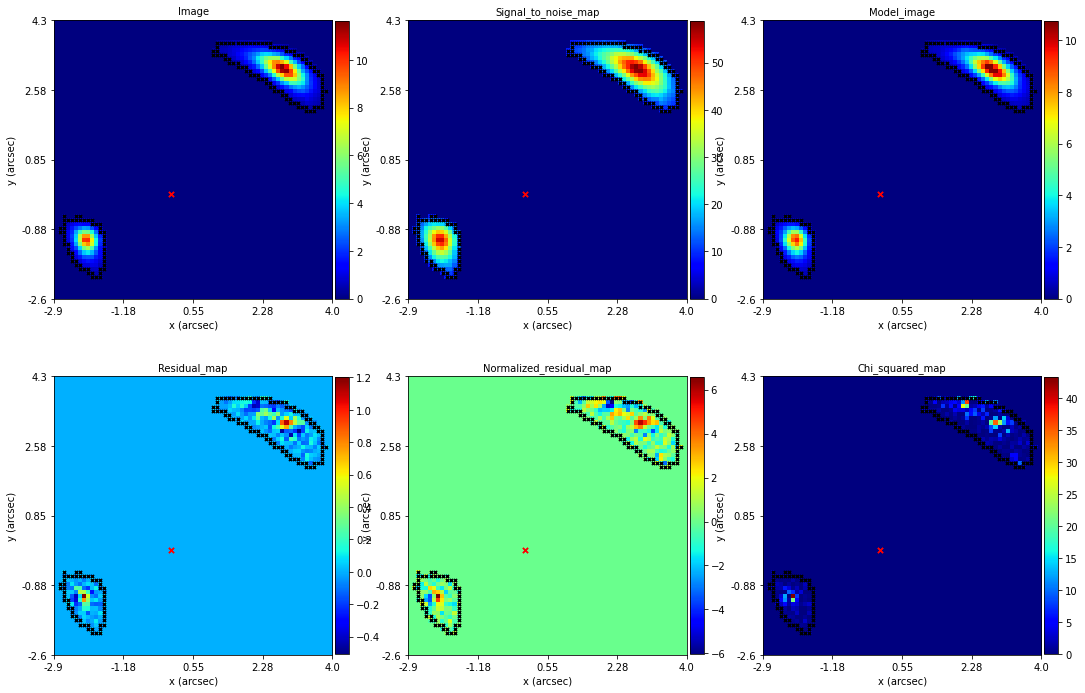

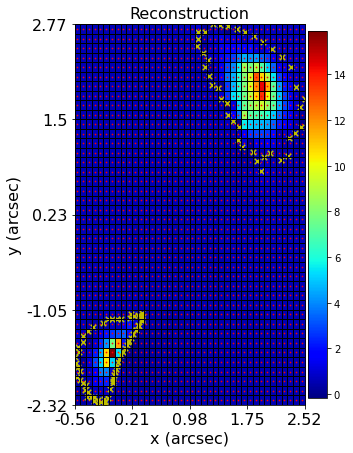

-610.9987180980655

In [16]:
plt.figure(figsize=(10,10))
emcee_model(p0)

## Best likelihood

In [17]:
p0 = best_walker
p0

array([6.620933  , 0.07759894, 0.52523011, 8.63638571, 0.02035821,
       7.13387842, 1.06837107])

ParsDic:
#------------------------------------#
{'ml': 6.620933003026282, 'kappa_s': 0.07759893681768695, 'qDM': 0.5252301127236148, 'log_mbh': 8.636385713112722, 'mag_shear': 0.020358210343705867, 'phi_shear': 7.133878415218469, 'gamma': 1.0683710724620998}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.3112775464605699)
axis_ratio: 0.5252301127236148
phi: 0.0
kappa_s: 0.07759893681768695
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 242.60100264759762
Log Normalization -1431.276864151163
Log Evidence: 13.20864926703075
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0683710724620998
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.3112775464605699)
axis_ratio: 0.5252301127236148
phi: 0.0
kappa_s:

<Figure size 720x720 with 0 Axes>

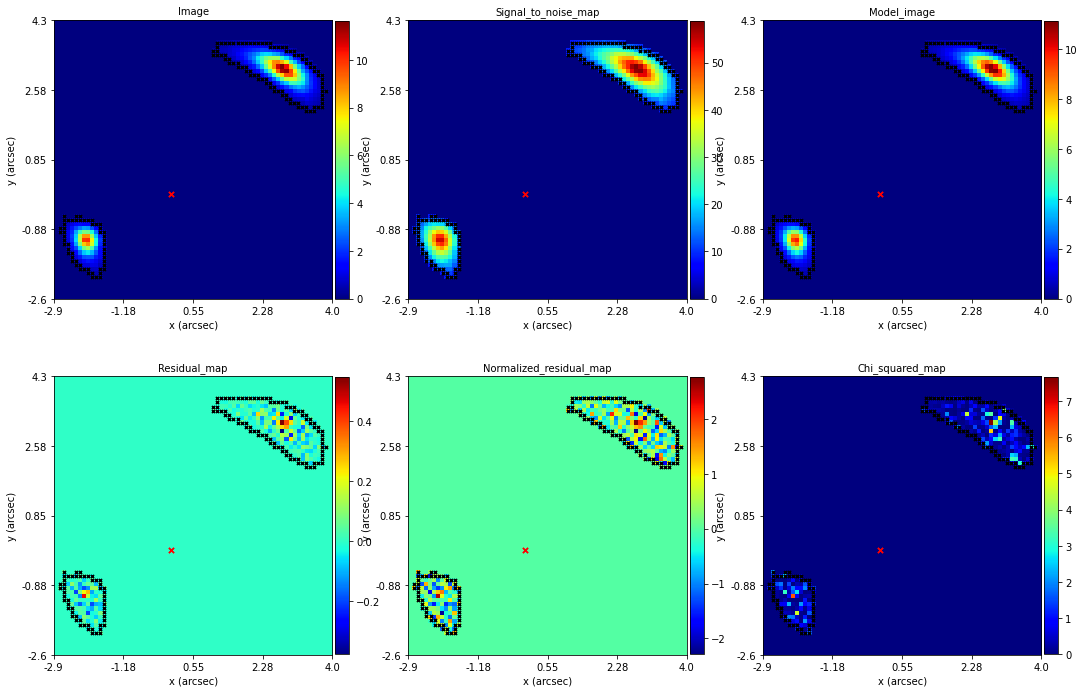

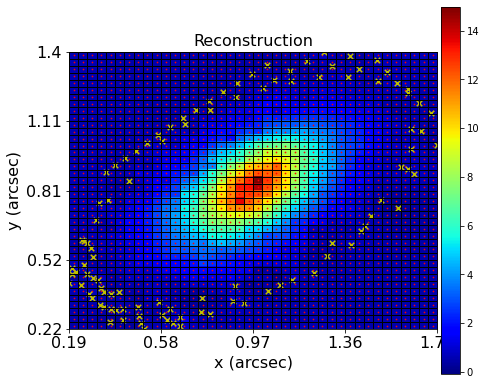

241.66608193767408

In [21]:
plt.figure(figsize=(10,10))
emcee_model(p0)

(0.9, 1.1)

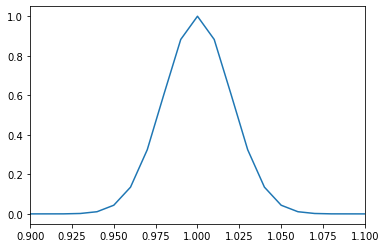

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)